In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3553, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,1.55,11654.0,2.0,2.0,3,2.0,New Property,1276.0,0,0,0,0,0,0,174
1,flat,vatika city,sector 49,3.60,11921.0,4.0,5.0,3,7.0,Moderately Old,3356.0,0,1,0,1,0,2,15
2,flat,godrej nature plus,sector 33,1.40,15119.0,3.0,2.0,3+,20.0,New Property,113.0,0,0,0,0,0,0,70
3,flat,ramprastha primera,sector 37d,1.20,13333.0,3.0,3.0,3,5.0,Relatively New,1000.0,0,0,1,0,0,0,50
4,flat,microtek greenburg,sector 86,1.25,8446.0,2.0,2.0,3,13.0,Moderately Old,1339.0,1,0,0,0,0,0,6


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 113,1.55,2.0,2.0,3,2.0,New Property,1276.0,0,0,0,0,0,0,174
1,flat,sector 49,3.60,4.0,5.0,3,7.0,Moderately Old,3356.0,0,1,0,1,0,2,15
2,flat,sector 33,1.40,3.0,2.0,3+,20.0,New Property,113.0,0,0,0,0,0,0,70
3,flat,sector 37d,1.20,3.0,3.0,3,5.0,Relatively New,1000.0,0,0,1,0,0,0,50
4,flat,sector 86,1.25,2.0,2.0,3,13.0,Moderately Old,1339.0,1,0,0,0,0,0,6


### luxury score

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='luxury_score'>

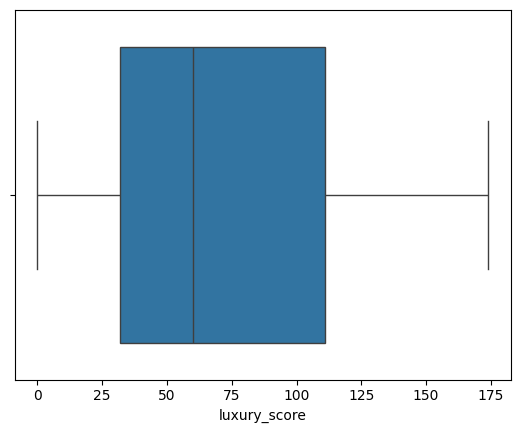

In [8]:
sns.boxplot(df['luxury_score'], orient='h')

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 113,1.55,2.0,2.0,3,2.0,New Property,1276.0,0,0,0,0,0,0,174,High
1,flat,sector 49,3.60,4.0,5.0,3,7.0,Moderately Old,3356.0,0,1,0,1,0,2,15,Low
2,flat,sector 33,1.40,3.0,2.0,3+,20.0,New Property,113.0,0,0,0,0,0,0,70,Medium
3,flat,sector 37d,1.20,3.0,3.0,3,5.0,Relatively New,1000.0,0,0,1,0,0,0,50,Medium
4,flat,sector 86,1.25,2.0,2.0,3,13.0,Moderately Old,1339.0,1,0,0,0,0,0,6,Low


### floorNum

C:\Users\ranja\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='floorNum'>

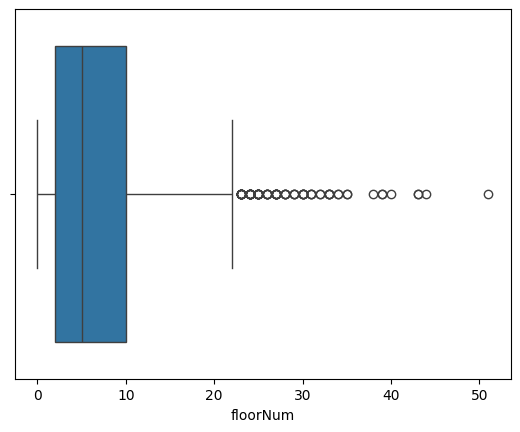

In [12]:
sns.boxplot(df['floorNum'], orient='h')

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 113,1.55,2.0,2.0,3,2.0,New Property,1276.0,0,0,0,0,0,0,174,High,Low Floor
1,flat,sector 49,3.60,4.0,5.0,3,7.0,Moderately Old,3356.0,0,1,0,1,0,2,15,Low,Mid Floor
2,flat,sector 33,1.40,3.0,2.0,3+,20.0,New Property,113.0,0,0,0,0,0,0,70,Medium,High Floor
3,flat,sector 37d,1.20,3.0,3.0,3,5.0,Relatively New,1000.0,0,0,1,0,0,0,50,Medium,Mid Floor
4,flat,sector 86,1.25,2.0,2.0,3,13.0,Moderately Old,1339.0,1,0,0,0,0,0,6,Low,High Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 113,1.55,2.0,2.0,3,New Property,1276.0,0,0,0,0,0,0,High,Low Floor
1,flat,sector 49,3.60,4.0,5.0,3,Moderately Old,3356.0,0,1,0,1,0,2,Low,Mid Floor
2,flat,sector 33,1.40,3.0,2.0,3+,New Property,113.0,0,0,0,0,0,0,Medium,High Floor
3,flat,sector 37d,1.20,3.0,3.0,3,Relatively New,1000.0,0,0,1,0,0,0,Medium,Mid Floor
4,flat,sector 86,1.25,2.0,2.0,3,Moderately Old,1339.0,1,0,0,0,0,0,Low,High Floor


In [18]:
export_df = train_df.to_csv('gurgaon_properties_post_feature_selection_v2.csv',index=False)

In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [20]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,19.0,2.0,2.0,3.0,1.0,1276.00,0,0,0,0,0,0,0.0,1.0
1,0.0,57.0,4.0,5.0,3.0,0.0,3356.00,0,1,0,1,0,2,1.0,2.0
2,0.0,41.0,3.0,2.0,4.0,1.0,113.00,0,0,0,0,0,0,2.0,0.0
3,0.0,46.0,3.0,3.0,3.0,3.0,1000.00,0,0,1,0,0,0,2.0,2.0
4,0.0,100.0,2.0,2.0,3.0,0.0,1339.00,1,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0.0,71.0,3.0,3.0,4.0,0.0,1595.00,0,1,0,0,0,1,0.0,0.0
3549,0.0,76.0,3.0,4.0,3.0,3.0,1700.00,0,1,0,0,0,1,2.0,2.0
3550,0.0,12.0,3.0,3.0,4.0,3.0,1275.53,1,0,0,0,0,0,2.0,2.0
3551,0.0,79.0,4.0,4.0,3.0,1.0,1809.00,0,0,0,0,0,0,1.0,1.0


In [21]:
y_label

0        1.55
1        3.60
2        1.40
3        1.20
4        1.25
        ...  
3548     2.04
3549     2.80
3550     1.20
3551     1.70
3552    10.50
Name: price, Length: 3553, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

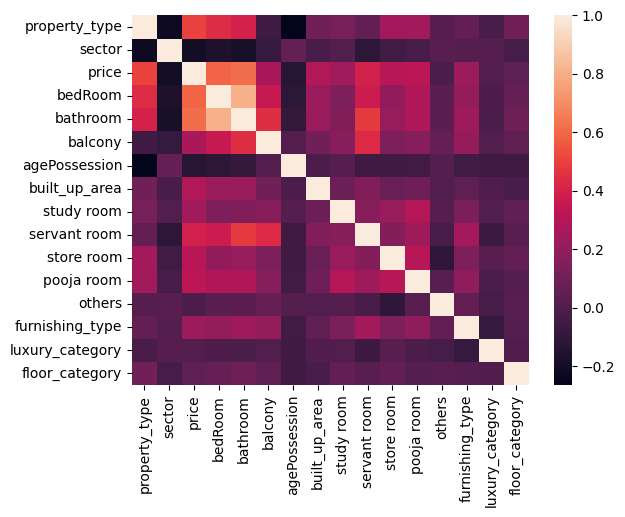

In [22]:
sns.heatmap(data_label_encoded.corr())

In [23]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.200564
1,price,1.000000
2,bedRoom,0.589735
3,bathroom,0.612487
4,balcony,0.271317
5,agePossession,-0.135386
6,built_up_area,0.289415
7,study room,0.239952
8,servant room,0.392958
9,store room,0.309664


### Technique 2 - Random Forest Feature Importance

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.626493
1,sector,0.109617
0,property_type,0.109366
2,bedRoom,0.032143
3,bathroom,0.027804
8,servant room,0.019775
5,agePossession,0.014358
4,balcony,0.012362
12,furnishing_type,0.011323
13,luxury_category,0.008281


### Technique 3 - Gradient Boosting Feature importances

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.668612
1,sector,0.107232
0,property_type,0.104019
3,bathroom,0.037697
2,bedRoom,0.036277
8,servant room,0.025943
9,store room,0.006542
5,agePossession,0.004572
12,furnishing_type,0.003315
4,balcony,0.001807


### Technique 4 - Permutation Importance

In [26]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.626505
1,sector,0.145511
0,property_type,0.137298
8,servant room,0.037205
2,bedRoom,0.011024
5,agePossession,0.007580
13,luxury_category,0.004204
9,store room,0.002434
3,bathroom,0.002284
10,pooja room,0.001805


### Technique 5 - LASSO

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
0,property_type,0.774399
3,bathroom,0.610278
2,bedRoom,0.404716
6,built_up_area,0.374091
8,servant room,0.370302
9,store room,0.244658
7,study room,0.211578
12,furnishing_type,0.163128
10,pooja room,0.117677
13,luxury_category,0.076839


### Technique 6 - RFE

In [28]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.624735
0,property_type,0.113061
1,sector,0.105900
3,bathroom,0.029253
2,bedRoom,0.028667
8,servant room,0.019999
5,agePossession,0.015021
4,balcony,0.012548
12,furnishing_type,0.011689
9,store room,0.008051


### Technique 7 - Linear Regression Weights

In [29]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
0,property_type,0.780251
3,bathroom,0.607648
2,bedRoom,0.404676
6,built_up_area,0.381236
8,servant room,0.372562
9,store room,0.247206
7,study room,0.217626
12,furnishing_type,0.170759
10,pooja room,0.120651
13,luxury_category,0.087025


### Technique 8 - SHAP

In [30]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.20723915,  0.12265299, -0.0566301 , ..., -0.01295196,
         0.05319575, -0.00899989],
       [-1.23079973,  0.37193613, -0.00947467, ...,  0.03977301,
         0.01728845, -0.03818196],
       [-0.17355752,  0.12242535, -0.02292245, ..., -0.01442189,
         0.00723472,  0.01454555],
       ...,
       [-0.23908724, -0.15836683, -0.02170924, ..., -0.0165497 ,
         0.00532902, -0.02463072],
       [-0.32312335,  0.09726626,  0.04606253, ..., -0.03445306,
        -0.00314228, -0.01742313],
       [ 1.59240733,  0.73716729,  0.36283636, ...,  0.04596438,
         0.10752633, -0.006589  ]])

In [32]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.223234
0,property_type,0.491446
1,sector,0.399898
3,bathroom,0.135270
8,servant room,0.089236
2,bedRoom,0.071100
4,balcony,0.039422
12,furnishing_type,0.031925
5,agePossession,0.026277
14,floor_category,0.024313


In [33]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [34]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.200564,0.109617,0.107232,0.145511,-0.134498,0.105900,-0.142437,0.399898
bedRoom,0.589735,0.032143,0.036277,0.011024,0.404716,0.028667,0.404676,0.071100
bathroom,0.612487,0.027804,0.037697,0.002284,0.610278,0.029253,0.607648,0.135270
balcony,0.271317,0.012362,0.001807,0.001038,0.051909,0.012548,0.058864,0.039422
agePossession,-0.135386,0.014358,0.004572,0.007580,-0.007143,0.015021,-0.014547,0.026277
built_up_area,0.289415,0.626493,0.668612,0.626505,0.374091,0.624735,0.381236,1.223234
study room,0.239952,0.007102,0.001610,0.000879,0.211578,0.007924,0.217626,0.018940
servant room,0.392958,0.019775,0.025943,0.037205,0.370302,0.019999,0.372562,0.089236
store room,0.309664,0.005715,0.006542,0.002434,0.244658,0.008051,0.247206,0.013524


In [35]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [36]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.695598
sector             0.144892
bathroom           0.034602
servant room       0.032037
bedRoom            0.031132
agePossession      0.011922
balcony            0.009987
furnishing_type    0.008571
luxury_category    0.006590
store room         0.006418
study room         0.005743
floor_category     0.005408
pooja room         0.004750
others             0.002349
dtype: float64

In [37]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,19.0,2.0,2.0,3.0,1.0,1276.00,0,0,0,0,0,0,0.0,1.0
1,0.0,57.0,4.0,5.0,3.0,0.0,3356.00,0,1,0,1,0,2,1.0,2.0
2,0.0,41.0,3.0,2.0,4.0,1.0,113.00,0,0,0,0,0,0,2.0,0.0
3,0.0,46.0,3.0,3.0,3.0,3.0,1000.00,0,0,1,0,0,0,2.0,2.0
4,0.0,100.0,2.0,2.0,3.0,0.0,1339.00,1,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0.0,71.0,3.0,3.0,4.0,0.0,1595.00,0,1,0,0,0,1,0.0,0.0
3549,0.0,76.0,3.0,4.0,3.0,3.0,1700.00,0,1,0,0,0,1,2.0,2.0
3550,0.0,12.0,3.0,3.0,4.0,3.0,1275.53,1,0,0,0,0,0,2.0,2.0
3551,0.0,79.0,4.0,4.0,3.0,1.0,1809.00,0,0,0,0,0,0,1.0,1.0


In [38]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [39]:
scores.mean()

0.8087282658955376

In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [41]:
scores.mean()

0.8087092296795634

In [42]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [43]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [44]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,19.0,2.0,2.0,3.0,1.0,1276.00,0,0,0,0.0,1.0,1.55
1,0.0,57.0,4.0,5.0,3.0,0.0,3356.00,1,0,2,1.0,2.0,3.60
2,0.0,41.0,3.0,2.0,4.0,1.0,113.00,0,0,0,2.0,0.0,1.40
3,0.0,46.0,3.0,3.0,3.0,3.0,1000.00,0,1,0,2.0,2.0,1.20
4,0.0,100.0,2.0,2.0,3.0,0.0,1339.00,0,0,0,1.0,0.0,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0.0,71.0,3.0,3.0,4.0,0.0,1595.00,1,0,1,0.0,0.0,2.04
3549,0.0,76.0,3.0,4.0,3.0,3.0,1700.00,1,0,1,2.0,2.0,2.80
3550,0.0,12.0,3.0,3.0,4.0,3.0,1275.53,0,0,0,2.0,2.0,1.20
3551,0.0,79.0,4.0,4.0,3.0,1.0,1809.00,0,0,0,1.0,1.0,1.70
